## Simulation

In [27]:
import sys
sys.path.append('/Users/thuan/Projects/xp-algorithms/sequential-testing/')

import numpy as np
import scipy.stats as stats
import util.helper as helper
import util.sim_rope as sim_rope
import util.msprt_core as msprt_core
import matplotlib.pyplot as plt
%matplotlib inline

/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


(-0.5, 0.5)

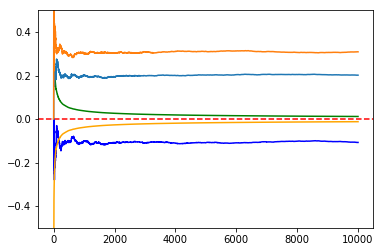

In [7]:
np.random.seed(2029)
size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.3, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for i in range(10000):
    n = i+1
    mu1 = a1[i]/n
    mu2 = a2[i]/n
    Mu1.append(mu1)
    Mu2.append(mu2)
    effect1.append(mu1-mu2)
    v1 = mu1*(1-mu1)
    v2 = mu2*(1-mu2)
    sigma = np.sqrt(v1/n+v2/n)
    df0 = (v1/n+v2/n)**2
    df1 = (v1**2/(n**2*(n-1)))+(v2**2/(n**2*(n-1)))
    df = df0/df1
    pv = stats.t.ppf(0.975, df) 
    ub1.append(pv*sigma)
    lb1.append(-1*pv*sigma)
    
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(effect1, color='blue')
plt.plot(ub1, color='green')
plt.plot(lb1, color='orange')
plt.plot(Mu1, label='mu1')
plt.plot(Mu2, label='mu2')
plt.ylim([-0.5,0.5])

/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


(0, 200)

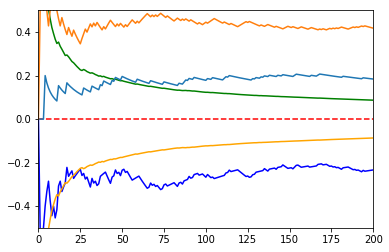

In [25]:
np.random.seed(2021)
size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.2, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.4, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for i in range(10000):
    n = i+1
    mu1 = a1[i]/n
    mu2 = a2[i]/n
    Mu1.append(mu1)
    Mu2.append(mu2)
    effect1.append(mu1-mu2)
    v1 = mu1*(1-mu1)
    v2 = mu2*(1-mu2)
    sigma = np.sqrt(v1/n+v2/n)
    df0 = (v1/n+v2/n)**2
    df1 = (v1**2/(n**2*(n-1)))+(v2**2/(n**2*(n-1)))
    df = df0/df1
    pv = stats.t.ppf(0.975, df) 
    ub1.append(pv*sigma)
    lb1.append(-1*pv*sigma)
    
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(effect1, color='blue')
plt.plot(ub1, color='green')
plt.plot(lb1, color='orange')
plt.plot(Mu1, label='mu1')
plt.plot(Mu2, label='mu2')
plt.ylim([-0.5,0.5])
plt.xlim([0,200])

In [23]:
ss = helper.sample_size(mu=0.8, mde_value=0.3, pr=True)

Sample size for mu=0.8000, relative_mde_value=0.3000, absolute_mde_value=0.2400, alpha=0.0500, beta=0.0500:
variant_sample_size=27, total_sample_size=53


/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/thuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


(-0.95, 0.95)

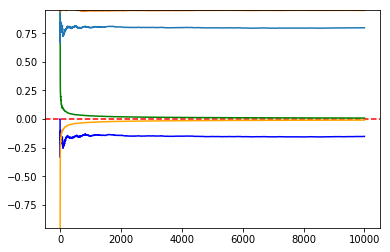

In [17]:
np.random.seed(2029)
size = 10000
a1 = np.cumsum(np.random.binomial(1, 0.8, size=size))
a2 = np.cumsum(np.random.binomial(1, 0.95, size=size))

effect1 = []
ub1 = []
lb1 = []
Mu1 = []
Mu2 = []

for i in range(10000):
    n = i+1
    mu1 = a1[i]/n
    mu2 = a2[i]/n
    Mu1.append(mu1)
    Mu2.append(mu2)
    effect1.append(mu1-mu2)
    v1 = mu1*(1-mu1)
    v2 = mu2*(1-mu2)
    sigma = np.sqrt(v1/n+v2/n)
    df0 = (v1/n+v2/n)**2
    df1 = (v1**2/(n**2*(n-1)))+(v2**2/(n**2*(n-1)))
    df = df0/df1
    pv = stats.t.ppf(0.975, df) 
    ub1.append(pv*sigma)
    lb1.append(-1*pv*sigma)
    
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(effect1, color='blue')
plt.plot(ub1, color='green')
plt.plot(lb1, color='orange')
plt.plot(Mu1, label='mu1')
plt.plot(Mu2, label='mu2')
plt.ylim([-0.95,0.95])

In [50]:
mu_lst = [0.02, 0.05, 0.08, 0.2, 0.5, 0.8]

for mu in mu_lst:
    s1 = helper.sample_size(mu=mu, mde_value=0.02, pr=False)
    ss1 = s1['variant_sample_size']
    ss2 = msprt_core.estimate_sample_size(mu, relative_mde_value=0.02, pr=False)
    print("mu={:.2f}, ss1={:,.0f}, ss2={:,.0f}, {:.2f}, {:.2f}"
          .format(mu, ss1, ss2, ss1/ss2, ss1*0.1/(ss2*0.15)))

mu=0.02, ss1=3,214,878, ss2=1,925,209, 1.67, 1.11
mu=0.05, ss1=1,246,180, ss2=746,266, 1.67, 1.11
mu=0.08, ss1=754,005, ss2=451,531, 1.67, 1.11
mu=0.20, ss1=261,830, ss2=156,795, 1.67, 1.11
mu=0.50, ss1=64,961, ss2=38,901, 1.67, 1.11
mu=0.80, ss1=15,743, ss2=9,427, 1.67, 1.11


## References:
    
[1] R. Johari, P. Koomen, L. Pekelis, and D. Walsh, "Peeking at a/b tests: Why it matters, and what to do about it," in Proceedings of the 23rd ACM SIGKDD International Conference
on Knowledge Discovery and Data Mining. ACM, 2017, pp. 1517–1525.

[2] Z. Zhao, M. Liu, and A. Deb, "Safely and Quickly Deploying New Features with a Staged Rollout Framework Using Sequential Test and Adaptive Experimental Design," in 3rd International Conference on Computational Intelligence and Applications (ICCIA). IEEE, 2018, pp. 59–70.